# フーリエ解析

フーリエ解析（Fourier analysis）：信号を異なる周波数の正弦波（sin）の重ね合わせとして表現すること

例えば画像を周波数の表現にして、周波数をフーリエ解析で分解したりする。

## フーリエ級数

幅$T$の区間$[-T/2, T/2]$における連続関数$f(t)$はフーリエ級数に展開できる

$$
f(t)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\left(a_k \cos k \omega_o t+b_k \sin k \omega_o t\right), \quad-\frac{T}{2} \leq t \leq \frac{T}{2}
$$

フーリエ係数は

$$
a_k=\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \cos k \omega_o t \mathrm{~d} t, \quad b_k=\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \sin k \omega_o t \mathrm{~d} t
$$

である。
ここで

$$
\omega_o=\frac{2 \pi}{T}
$$

である。これを **基本周波数** といい、フーリエ級数は関数$f(t)$を$\omega_o$の整数倍の周波数の正弦波の重ね合わせとして表現する。

$a_0/2$を **直流成分** と呼び、$\omega_o$の$k$倍の周波数の振動を第$k$ **高調波** と呼ぶ。以下では$t$を「時刻」とみなし、$f(t)$を「信号」と呼ぶ。

:::{margin}

周波数は振動数（ヘルツ Hz：1秒間における振動数）ではない

波の数を数えるとき、1周期を1個とするのではなく、$2\pi$と数える（単位はラジアン）。波を数える角度を **位相（角）** と呼ぶ

:::

## 複素数の指数関数

### 複素数

複素数とは $z=x+i y$ のように **実（数）部** $x$ に **虚（数）部** $y$ の $i$ 倍を足したもの

$i$ は **虚数単位** と呼ばれ、 $i^2=-1$ となる数と約束したもの。

$x$軸を実部 $x=\operatorname{Re} z$、$y$軸を 虚部 $y=\operatorname{Im} z$にとった平面を **複素平面** と呼ぶ


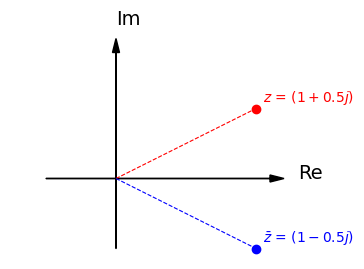

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))

ax.arrow(-0.5, 0, 1.7, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -0.5, 0, 1.5, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "Re", fontsize=14, color='black')
ax.text(0, 1.1, "Im", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])

c = 1 + 0.5j # 複素数
complex_points = [c, c.conjugate()] # conjugate: 共役複素数
colors = ['red', 'blue']

for i, (point, color) in enumerate(zip(complex_points, colors)):
    x, y = point.real, point.imag
    ax.plot([0, x], [0, y], color=color, linestyle='--', linewidth=0.8)
    ax.scatter([x], [y], color=color)
    z = r"$z$" if i == 0 else r"$\bar{z}$"
    ax.text(x + 0.05, y + 0.05, f'{z} = ${point}$', fontsize=10, color=color)


plt.show()

### 共役複素数

複素数 $z=x+i y$ に対して, $\bar{z}=x-i y$ をその **共役（きょうやく）複素数** といい、 $z, \bar{z}$ は **互いに複素共役である** という。
これらは複素平面上で $x$ 軸に関して対称な位置にある。
この定義から

$$
x=\frac{z+\bar{z}}{2}, \quad y=\frac{z-\bar{z}}{2 i}
$$

となる。また重要な関係として

$$
z \bar{z}=(x+i y)(x-i y)=x^2+y^2=|z|^2
$$

が成り立つ。

### オイラーの式

指数部が虚数の指数関数 $e^{i \theta}$ を次の複素数と定義する。

$$
e^{i \theta}=\cos \theta+i \sin \theta
$$

これは **オイラーの式** と呼ばれる式で、複素平面の単位円上の実軸から角度$\theta$の点を表す。

:::{card} 定理

$$
e^{i \theta} e^{i \phi}=e^{i(\theta+\phi)}
$$

が成り立つ。
:::


:::{dropdown} 証明

定義より次のように変形できる

$$
\begin{aligned}
e^{i \theta} e^{i \phi} & =(\cos \theta+i \sin \theta)(\cos \phi+i \sin \phi) \\
& =(\cos \theta \cos \phi-\sin \theta \sin \phi)+i(\cos \theta \sin \phi+\sin \theta \cos \phi)\\
e^{i(\theta+\phi)} &=\cos (\theta+\phi)+i \sin (\theta+\phi)\\
\end{aligned}
$$

両者が等しいことは、三角関数の加法定理

$$
\begin{aligned}
\cos (\theta+\phi) &=\cos \theta \cos \phi-\sin \theta \sin \phi\\
\sin (\theta+\phi) &=\cos \theta \sin \phi+\sin \theta \cos \phi
\end{aligned}
$$

よりわかる
:::


:::{card} 定理

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}
, \quad
\sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

が成り立つ。

:::


:::{dropdown} 証明

オイラーの式 およびその式の $\theta$ を $-\theta$ に置き換えた式

$$
e^{i \theta}=\cos \theta+i \sin \theta
, \quad
e^{-i \theta}=\cos \theta-i \sin \theta
$$

を使うと、

$$
e^{i \theta} + e^{-i \theta}
= \cos \theta + i \sin \theta + \cos \theta-i \sin \theta
= 2 \cos \theta
$$

より

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}
$$

が得られる。また


$$
e^{i \theta} - e^{-i \theta}
= \cos \theta + i \sin \theta - \cos \theta + i \sin \theta
= 2i \sin \theta
$$

より

$$
\sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

が得られる。


:::


## フーリエ級数の複素表示

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}, \quad \sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

を使うと、フーリエ級数は以下のように表すことができる。

$$
\begin{aligned}
f(t) & =\frac{a_0}{2}+\sum_{k=1}^{\infty}\left(a_k \frac{e^{i k \omega_o t}+e^{-i k \omega_o t}}{2}+b_k \frac{e^{i k \omega_o t}-e^{-i k \omega_o t}}{2 i}\right) \\
& =\frac{a_0}{2}+\frac{1}{2} \sum_{k=1}^{\infty}\left(\left(a_k-i b_k\right) e^{i k \omega_o t}+\left(a_k+i b_k\right) e^{-i k \omega_o t}\right)\\
& =\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}
\end{aligned}
$$

ただし

$$
C_k=\left\{\begin{array}{cc}
\left(a_k-i b_k\right) / 2 & k>0 \\
a_0 / 2 & k=0 \\
\left(a_{-k}+i b_{-k}\right) / 2 & k<0
\end{array}\right.
$$

である

また、$C_k$の各式は次のように変形できる

$$
\begin{aligned}
\frac{a_k-i b_k}{2} & =\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \frac{\cos k \omega_o t-i \sin k \omega_o t}{2} \mathrm{~d} t=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t \\
\frac{a_0}{2} & =\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) \mathrm{d} t \\
\frac{a_{-k}+i b_{-k}}{2} & =\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \frac{\cos \left(-k \omega_o t\right)+i \sin \left(-k \omega_o t\right)}{2} \mathrm{~d} t \\
& =\frac{1}{T} \int_{-T / 2}^{T / 2} f(t)\left(\cos k \omega_o t-i \sin k \omega_o t\right) \mathrm{d} t=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
\end{aligned}
$$


$$
f(t)=\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}, \quad C_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
$$

この$C_k$を **（複素）フーリエ係数** と呼ぶ。

:::{info}

$f(t)$は実数なのに、フーリエ係数は複素数なのは問題ないのか？

→ $C_k$と$e^{i k \omega_o t}$は共役複素数なので掛けると虚部が消えて実数になる
:::

:::{info}

位相（波の数）は角度として表される。

特に複素平面上で単位円を考えると、位相は単位円の角度（回転）として表される
:::

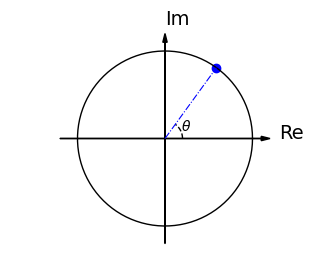

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "Re", fontsize=14, color='black')
ax.text(0, 1.3, "Im", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])


# 単位円
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, 'k-', linewidth=1)  # 黒い実線で単位円を描画

# curve
t = 0.3*np.pi
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, 'k--', linewidth=1)  # 黒い実線で単位円を描画

# text
m = len(x) // 2
ax.text(x[m], y[m], r"$\theta$")

# line
x = np.cos(t)
y = np.sin(t)
ax.plot([0, x], [0, y], color="blue", linestyle='-.', linewidth=0.8)
ax.scatter([x], [y], color="blue")

plt.show()

## フーリエ変換

フーリエ級数

$$
f(t)=\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}, \quad C_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
$$

において

$$
\omega_k=k \omega_o, \quad k=0, \pm 1, \pm 2, \ldots
$$

とおき、

$$
\Delta \omega=\omega_{k+1}-\omega_k=\omega_o=\frac{2 \pi}{T}, \quad C_k=\frac{F\left(\omega_k\right)}{T}
$$

と書くと、

$$
f(t)=\frac{1}{2 \pi} \sum_{k=-\infty}^{\infty} F\left(\omega_k\right) e^{i \omega_k t} \Delta \omega, \quad F\left(\omega_k\right)=\int_{-T / 2}^{T / 2} f(t) e^{-i \omega_k t} \mathrm{~d} t
$$

となる。周期$T\to\infty$とすると、$\Delta \omega \to 0$となり、積分として表すことができる。

$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

を信号$f(t)$の **フーリエ変換** と呼び、

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega
$$

を **逆フーリエ変換** と呼ぶ。

:::{note}

- 信号$f(t)$（逆フーリエ変換）は周波数$\omega$の正弦波$e^{i \omega t}$を負の数を含めたすべての実数$\omega$に対して重ね合わせている
- フーリエ変換 $F(\omega)$ は信号$f(t)$に$e^{i \omega t}$の共役複素数$e^{-i \omega t}$を掛けて、すべての時刻$t$で積分した形になっている
:::

逆フーリエ変換

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega
$$

は信号$f(t)$をあらゆる周波数（すべての実数の$\omega$）の振動の重ね合わせで表す。

$F(\omega)$は周波数$\omega$の成分$e^{i \omega t}$の大きさを表し、$f(t)$の **スペクトル** （フランス語: spectre、英語: spectrum）と呼ばれる。（光をプリズムに通して各色のスペクトルに分けるイメージ）

$|\omega|$が大きい成分は **高周波成分** 、小さい成分は **低周波成分** と呼ばれる。とくに$\omega=0$の成分は定数であり、 **直流成分** と呼ばれる。

### 例：方形窓・矩形窓

:::{card}

次の関数は幅$W$の **方形窓（rectangular window、矩形窓とも）** と呼ばれる

$$
w(t)=\left\{\begin{array}{cc}
1 / 2 W & -W \leq t \leq W \\
0 & \text { それ以外 }
\end{array}\right.
$$

このフーリエ変換は

$$
\begin{aligned}
W(\omega)
&=\frac{1}{2 W} \int_{-W}^W e^{-i \omega t} \mathrm{~d} t \\
&=\frac{1}{2 W} \int_{-W}^W(\cos \omega t-i \sin \omega t) \mathrm{d} t \quad (オイラーの式より e^{-i \omega t} = \cos \omega t-i \sin \omega t)\\
&=\frac{1}{2 W} \left( \int_{-W}^W \cos \omega t ~\mathrm{d} t  - \int_{-W}^W i \sin \omega t ~\mathrm{d} t \right)
\quad (\because 積分の線形性)
\\
&=\frac{1}{2W} \int_{-W}^W \cos \omega t ~ \mathrm{d} t
\quad (\because \sinは奇関数すなわち \sin(-\theta) = -\sin(\theta) であり、-Wから+Wまで積分したら0になるため消える )
\\
&=\frac{1}{W} \int_0^W \cos \omega t \mathrm{~d} t
\quad (\because \int_{-W}^W \cos \omega t ~ \mathrm{d} t = 2 \int_{0}^W \cos \omega t ~ \mathrm{d} t )
\\
&=\frac{1}{W}\left[ \frac{\sin \omega t}{\omega} \right]_0^W
\quad (\because \int \cos (\omega t) d t=\frac{\sin (\omega t)}{\omega} )
\\
&=\frac{1}{W} \left( \frac{\sin \omega W}{\omega} - \frac{\sin 0}{\omega} \right)
\\
&=\frac{\sin W \omega}{W \omega}
\quad (\because \sin 0 = 0)
\\
&=\operatorname{sinc} \frac{W}{\pi} \omega
\end{aligned}
$$

となる。ただし、

$$
\operatorname{sinc} x :=\frac{\sin \pi x}{\pi x}
$$

と定義する。
:::

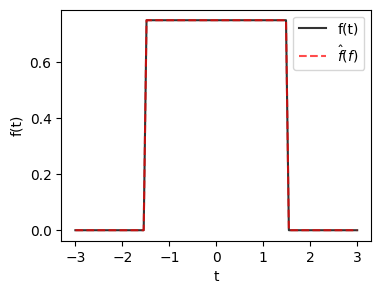

In [39]:
# 参考：numpyの高速フーリエ変換 fft を使う場合
# 自分で離散的なデータポイントからフーリエ変換するのは離散フーリエ変換を学んでからやる
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))

# もとの関数 f(t)
w = 1.5  # width
def f(t):
    return (1/2*w) * 1 * ((-w <= t) & (t <= w))

t = np.linspace(-3, 3, 100)
y = f(t)
ax.plot(t, f(t), label="f(t)", color="black", alpha=0.8)

# フーリエ変換 F(omega)
fourier = np.fft.fft(y)
inv_fourier = np.fft.ifft(fourier).real  # 実部のみ
ax.plot(t, inv_fourier, label=r"$\hat{f}(f)$", color="red", linestyle="--", alpha=0.7)

ax.set(xlabel="t", ylabel="f(t)")
ax.legend()
plt.show()

:::{card}

次の関数$w(t)$ を幅$\sigma$の **ガウス窓（Gaussian window）** という。

$$
w(t)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-t^2 / 2 \sigma^2}
$$

このフーリエ変換は

$$
\begin{aligned}
W(\omega)
&= \int_{-\infty}^{\infty} w(t) e^{-i \omega t} \mathrm{~d} t \\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-t^2 / 2 \sigma^2} e^{-i \omega t} \mathrm{~d} t \\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty}
e^{-( \frac{t^2}{2 \sigma^2} + i \omega t)} \mathrm{~d} t
\quad ( 指数法則 a^{n}a^m=a^{n+m})\\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-\left(t+i \sigma^2 \omega\right)^2 / 2 \sigma^2-\sigma^2 \omega^2 / 2} \mathrm{~d} t
\quad (平方完成したり色々いじるとこうなる)
\\
&= \left(\frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-\left(t+i \sigma^2 \omega\right)^2 / 2 \sigma^2} \mathrm{~d} t\right) e^{-\sigma^2 \omega^2 / 2}
\end{aligned}
$$

ここで $z=t+i \sigma^2 \omega$と変数変換すると

$$
\begin{aligned}
W(\omega)
& =\left(\frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-z^2 / 2 \sigma^2} \mathrm{~d} z\right) e^{-\sigma^2 \omega^2 / 2} \\
& =e^{-\sigma^2 \omega^2 / 2}\\
&=\frac{\sqrt{2 \pi}}{\sigma}\left(\frac{1}{\sqrt{2 \pi} \sigma^{-1}} e^{-\omega^2 / 2 \sigma^{-2}}\right)
\end{aligned}
$$

となる

:::